In [9]:
# %pip uninstall numpy -v
%pip install seaborn -v

Using pip 22.0.4 from c:\Users\peisz\AppData\Local\Programs\Python\Python39\lib\site-packages\pip (python 3.9)Note: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Users\peisz\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, AveragePooling2D, UpSampling2D, Reshape, Dropout,Conv2D,MaxPool2D,InputLayer,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import h5py
import matplotlib.pyplot as plt
from PIL import Image
import cv2

import seaborn as sns
import pandas as pd

In [2]:
x_ = np.load('img_toughness.npy')

In [3]:
y_ = np.load('label_toughness.npy')

In [4]:
def plot_images(*images):
    fig, ax = plt.subplots(1, len(images), figsize=(3*len(images), 4))
    for a, i in zip(ax, images):
        im = a.imshow(np.squeeze(i), vmin=0, vmax=1, cmap='plasma')  # You can try different colormaps like 'plasma', 'magma', 'inferno', 'hot', 'cool', etc
        a.axis('off')

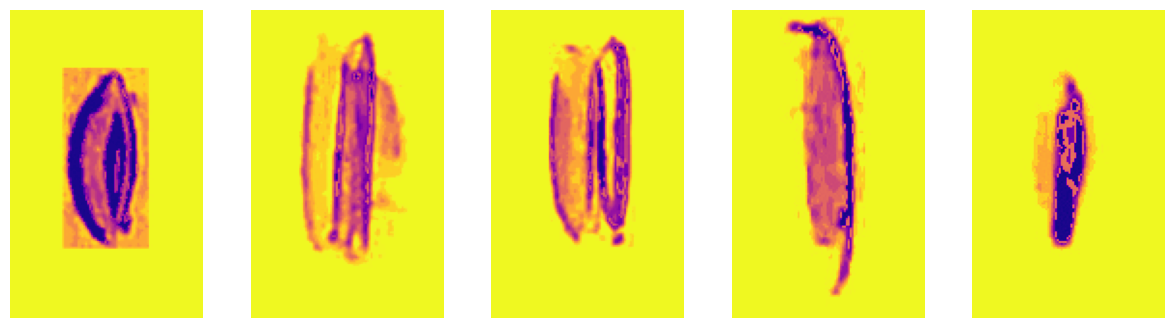

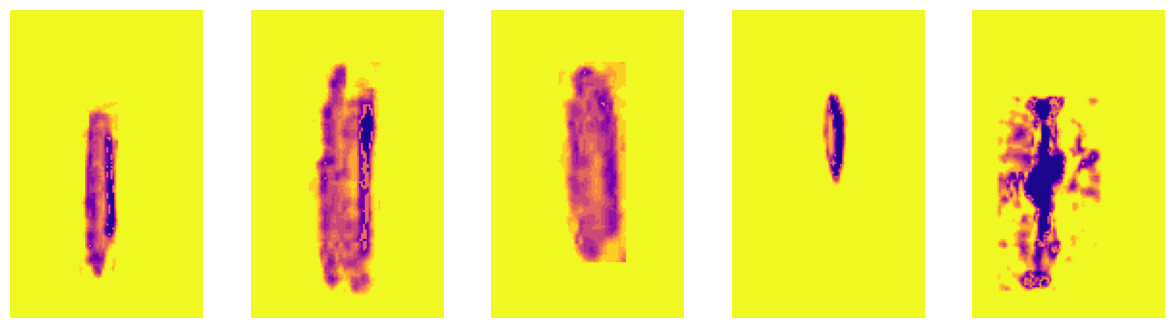

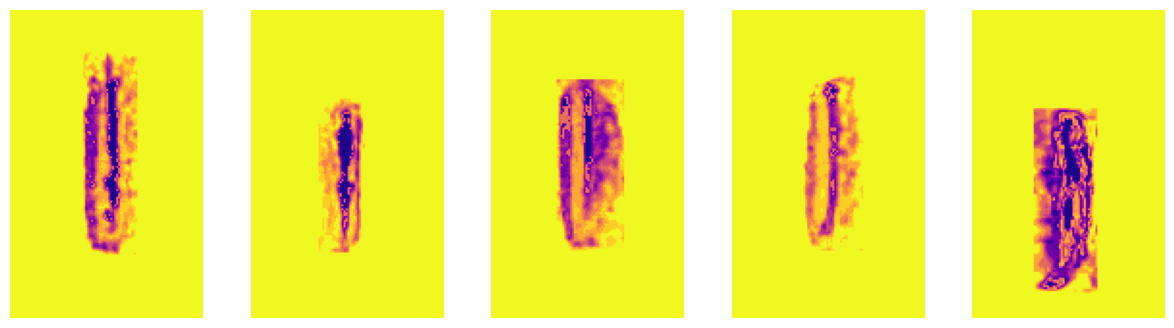

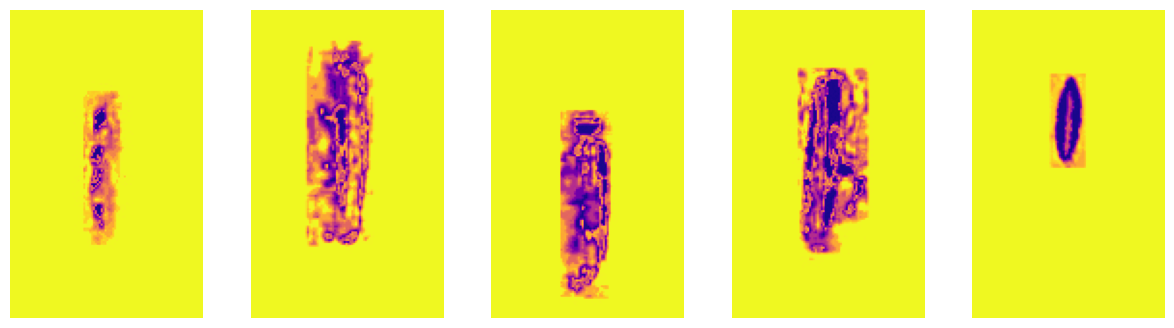

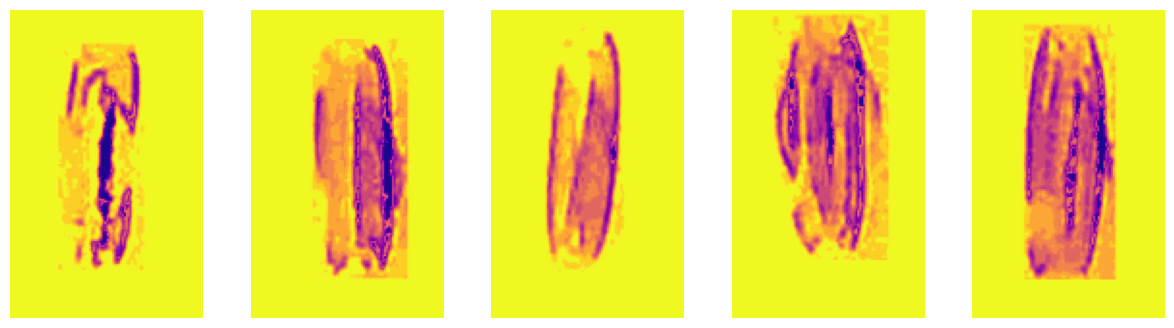

In [5]:
plot_images(x_[25],x_[26],x_[27],x_[3],x_[4])
plot_images(x_[5],x_[6],x_[7],x_[8],x_[9]) 
plot_images(x_[10],x_[11],x_[12],x_[13],x_[14])
plot_images(x_[15],x_[16],x_[17],x_[18],x_[19])
plot_images(x_[20],x_[21],x_[22],x_[23],x_[24])

In [18]:
%pip install scikit-learn -v

Using pip 22.0.4 from c:\Users\peisz\AppData\Local\Programs\Python\Python39\lib\site-packages\pip (python 3.9)
     ---------------------------------------- 11.0/11.0 MB 5.6 MB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Link requires a different Python (3.9.13 not in: '>=3.10'): https://files.pythonhosted.org/packages/a1/ee/e1023e41c2c9f9ac7b9d2bafd445b6036d2a2226000028c8c3202eee5234/scipy-1.14.0rc1.tar.gz#sha256=1e04538267216e6e4e738514c0f2ce01a811e97aa9bc1982d35be91aa055f384 (from https://pypi.org/simple/scipy/) (requires-python:>=3.10)
  Link requires a different Python (3.9.13 not in: '>=3.10'): https://files.pythonhosted.org/packages/50/91/62f158448035e9a6e6df9eb472307e5ce207d30e99eac6dc7bebefd83a48/scipy-1.14.0rc2.tar.gz#sha256=67a0ebbf3c2ac35468af89d3da3b9ffecff1f265f854bdfe836a5ded139f73b1 (from https://pypi.org/simple/scipy/) (requires-python:>=3.10)
  Link requires a different Python (3.9.13 not in: '>=3.10'): https://files.pythonhosted.org/pa

You should consider upgrading via the 'c:\Users\peisz\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_.reshape((-1,160,100,1)), y_, test_size=0.18, random_state=60)


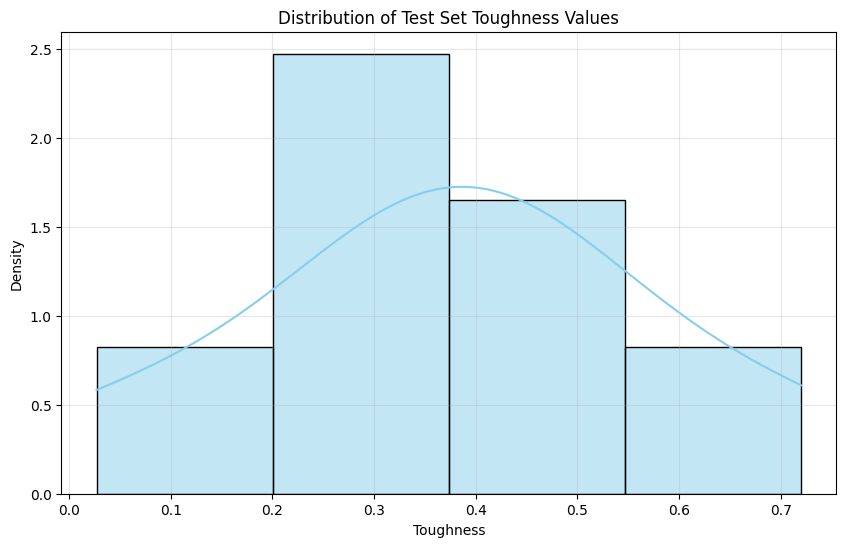

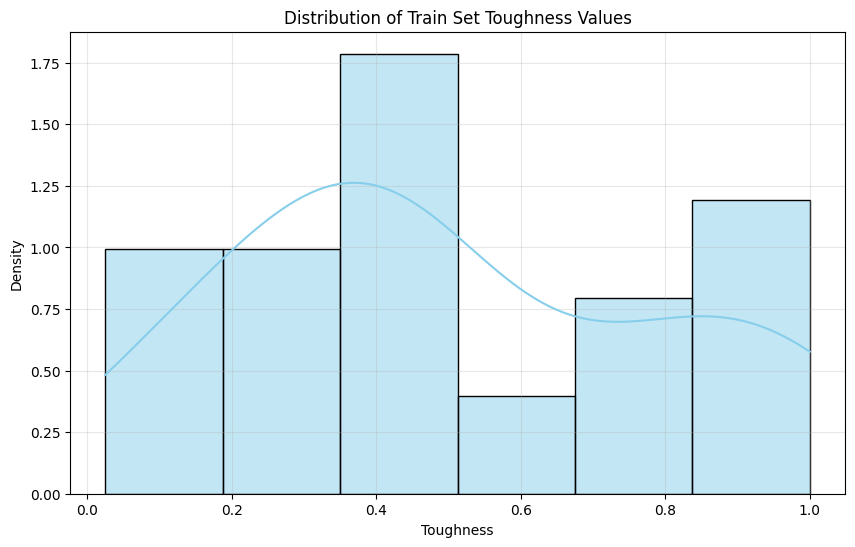

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=y_test, kde=True, stat="density", color="skyblue")
plt.title("Distribution of Test Set Toughness Values", fontsize=12)
plt.xlabel("Toughness", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.grid(True, alpha=0.3)

plt.figure(figsize=(10, 6))
sns.histplot(data=y_train, kde=True, stat="density", color="skyblue")
plt.title("Distribution of Train Set Toughness Values", fontsize=12)
plt.xlabel("Toughness", fontsize=10)
plt.ylabel("Density", fontsize=10)
plt.grid(True, alpha=0.3)

C:\Users\peisz\AppData\Local\Temp\ipykernel_11844\1081498224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)
C:\Users\peisz\AppData\Local\Temp\ipykernel_11844\1081498224.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)


<Axes: ylabel='Density'>

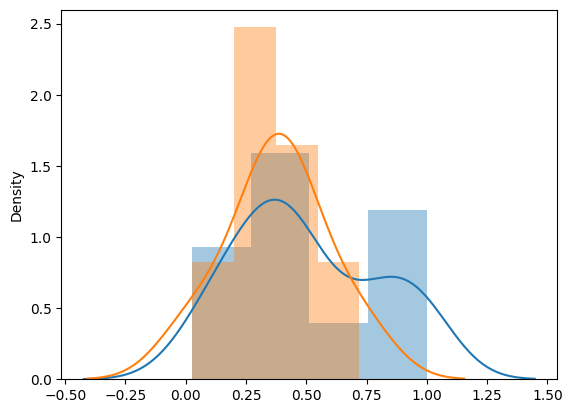

In [8]:
sns.distplot(y_train)
sns.distplot(y_test)

In [15]:
model = Sequential()
model.add(InputLayer(input_shape=(160, 100, 1)))

# 1st conv block
model.add(Conv2D(3, (5, 5), activation='sigmoid', strides=(1, 1), padding='same',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(3, (5, 5), activation='sigmoid', strides=(2, 2), padding='same',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
#3rd conv block
model.add(Conv2D(5, (3, 3), activation='sigmoid', strides=(2, 2), padding='same',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=16, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(units=8, activation='relu',kernel_regularizer=l2(0.001)))
#model.add(Dropout(0.2))
# output layer
model.add(Dense(units=1, activation='sigmoid',kernel_regularizer=l2(0.001)))

c:\Users\peisz\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, 
    MaxPooling2D, GlobalAveragePooling2D, Dense, Add
)

def residual_block(x, filters, kernel_size=3, stride=1):
    # Store input
    shortcut = x
    
    # First convolution layer
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Second convolution layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    
    # If dimensions changed, adjust shortcut path
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    # Add shortcut to main path
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    
    return x

# Define the ResNet model
inputs = Input(shape=(160, 100, 1))

# Initial convolution
x = Conv2D(64, 7, strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(3, strides=2, padding='same')(x)

# Residual blocks
x = residual_block(x, 64)
x = residual_block(x, 64)
x = residual_block(x, 128, stride=2)
x = residual_block(x, 128)
x = residual_block(x, 256, stride=2)
x = residual_block(x, 256)

# Final layers
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
outputs = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001))(x)

# Create model
model = Model(inputs=inputs, outputs=outputs)



In [22]:
model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 160, 100,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 80, 50,    │      3,200 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 50,    │        256 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 80, 50,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 40, 25,    │          0 │ activation_13[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 40, 25,    │     36,928 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 25,    │        256 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 40, 25,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 40, 25,    │     36,928 │ activation_14[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 25,    │        256 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 40, 25,    │          0 │ max_pooling2d_4[… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 40, 25,    │          0 │ add_6[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 40, 25,    │     36,928 │ activation_15[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 25,    │        256 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 40, 25,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 40, 25,    │     36,928 │ activation_16[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 25,    │        256 │ conv2d_22[0][0] 

 Total params: 2,824,449 (10.77 MB)

 Trainable params: 2,819,969 (10.76 MB)

 Non-trainable params: 4,480 (17.50 KB)

In [23]:
model.compile(optimizer=Adam(0.0005), loss='mse')

In [24]:
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    epochs=400,
    batch_size=20,
)

Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - loss: 0.3449 - val_loss: 0.3040
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 461ms/step - loss: 0.3018 - val_loss: 0.3076
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 408ms/step - loss: 0.2716 - val_loss: 0.3024
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - loss: 0.2594 - val_loss: 0.3036
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - loss: 0.2564 - val_loss: 0.3091
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 401ms/step - loss: 0.2572 - val_loss: 0.3287
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step - loss: 0.2481 - val_loss: 0.3527
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step - loss: 0.2458 - val_loss: 0.3846
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 372ms/step - loss: 0.2524 - val_loss: 0.4161
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 395ms/step - loss: 0.2388 - val_loss: 0.4354
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step - loss: 0.2374 - val_loss: 0.4720
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 393ms/step - loss: 0.235

In [25]:
# Calculate various metrics
y_pred = model.predict(x_train)
y_pred_test = model.predict(x_test)

# 1-step prediction MSE
train_mse = np.mean((y_pred.flatten() - y_train) ** 2)
test_mse = np.mean((y_pred_test.flatten() - y_test) ** 2)

print("1-Step Prediction MSE:")
print(f"Training MSE: {train_mse:.6f}")
print(f"Testing MSE: {test_mse:.6f}")

# 100-step prediction MSE (using sliding window)
def calculate_100step_mse(y_true, y_pred):
    errors = []
    for i in range(len(y_true) - 99):
        window_true = y_true[i:i+100]
        window_pred = y_pred[i:i+100]
        mse = np.mean((window_pred - window_true) ** 2)
        errors.append(mse)
    return np.mean(errors)

train_100step_mse = calculate_100step_mse(y_train, y_pred.flatten())
test_100step_mse = calculate_100step_mse(y_test, y_pred_test.flatten())

print("\n100-Step Prediction MSE:")
print(f"Training MSE: {train_100step_mse:.6f}")
print(f"Testing MSE: {test_100step_mse:.6f}")

# Calculate healing efficiency metrics
def calculate_healing_metrics(y_true, y_pred):
    # Scale predictions back to original range (50-200)
    y_true_scaled = 50 + y_true * 150
    y_pred_scaled = 50 + y_pred * 150
    
    # L2 loss of healing efficiency
    l2_loss = np.mean((y_true_scaled - y_pred_scaled) ** 2)
    
    # Terminal healing efficiency error
    terminal_error = np.abs(y_true_scaled[-1] - y_pred_scaled[-1]) / y_true_scaled[-1] * 100
    
    return l2_loss, terminal_error

train_l2, train_terminal = calculate_healing_metrics(y_train, y_pred.flatten())
test_l2, test_terminal = calculate_healing_metrics(y_test, y_pred_test.flatten())
# Calculate R^2 scores
from sklearn.metrics import r2_score, mean_squared_error
train_r2 = r2_score(y_train, y_pred.flatten())
test_r2 = r2_score(y_test, y_pred_test.flatten())

# Calculate RMSE scores
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred.flatten()))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test.flatten()))

print("\nR^2 Scores:")
print(f"Training R^2: {train_r2:.4f}")
print(f"Testing R^2: {test_r2:.4f}")

print("\nRMSE Scores:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")

print("\nHealing Efficiency Metrics:")
print(f"Training L2 Loss: {train_l2:.2f}")
print(f"Testing L2 Loss: {test_l2:.2f}")
print(f"Training Terminal Error (%): {train_terminal:.2f}")
print(f"Testing Terminal Error (%): {test_terminal:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
1-Step Prediction MSE:
Training MSE: 0.075250
Testing MSE: 0.034954

100-Step Prediction MSE:
Training MSE: nan
Testing MSE: nan

R^2 Scores:
Training R^2: 0.1157
Testing R^2: 0.1117

RMSE Scores:
Training RMSE: 0.2743
Testing RMSE: 0.1870

Healing Efficiency Metrics:
Training L2 Loss: 1693.13
Testing L2 Loss: 786.47
Training Terminal Error (%): 7.83
Testing Terminal Error (%): 28.10


c:\Users\peisz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\peisz\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


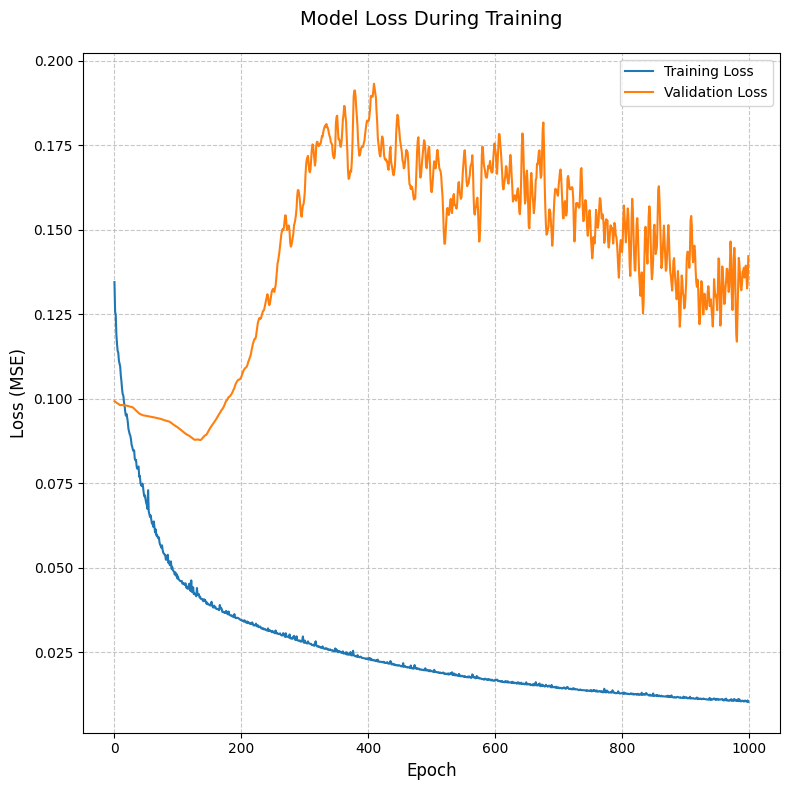

In [75]:
# Plot training and validation loss
plt.figure(figsize=(8, 8))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss During Training', fontsize=14, pad=20)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

plt.tight_layout()


In [76]:
train_number = 31
test_number = 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


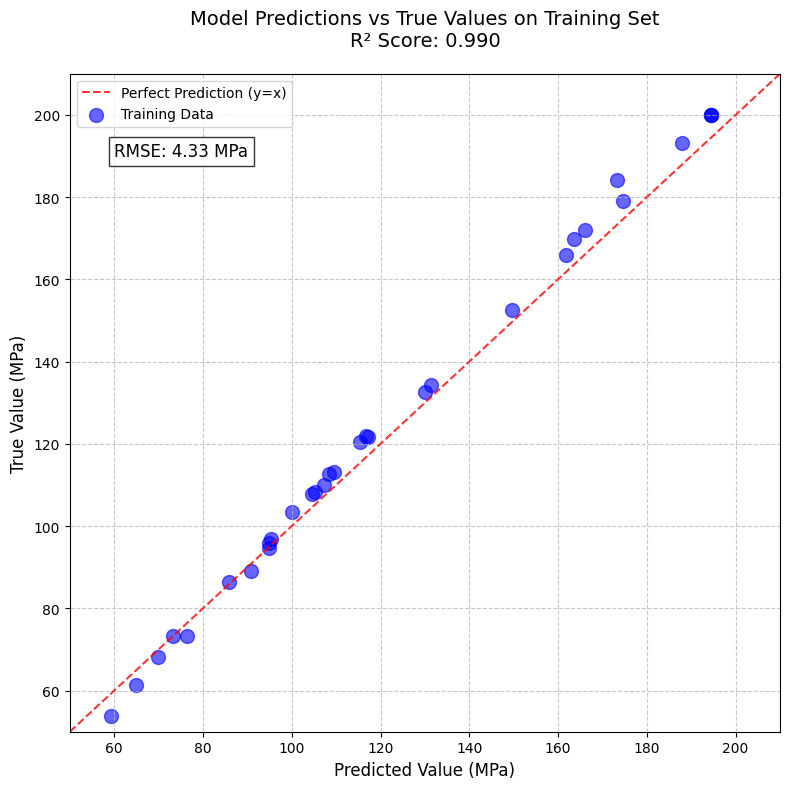

In [68]:
# Create figure with larger size for better visibility
plt.figure(figsize=(8, 8))

# Get predictions
y_pred_train = 50 + (model.predict(x_train[:,:,:,]).reshape(train_number))*150
y_true_train = (y_train)*150 + 50

# Plot settings
plt.xlim([50,210])
plt.ylim([50,210])
plt.grid(True, linestyle='--', alpha=0.7)

# Plot ideal line
xaxis = np.linspace(50,220,100)
plt.plot(xaxis, xaxis, 'r--', label='Perfect Prediction (y=x)', alpha=0.8)

# Scatter plot with larger markers and alpha for better visibility
plt.scatter(y_pred_train, y_true_train, c='blue', alpha=0.6, s=100, label='Training Data')

# Calculate mean squared error
mse = np.mean((y_pred_train - y_true_train) ** 2)
rmse = np.sqrt(mse)

# Labels and title
plt.ylabel("True Value (MPa)", fontsize=12)
plt.xlabel("Predicted Value (MPa)", fontsize=12)
# Calculate R² score (coefficient of determination)
# R² measures how well the model's predictions match the actual values
# R² = 1 - (sum of squared residuals) / (total sum of squares)
ss_res = np.sum((y_true_train - y_pred_train) ** 2)
ss_tot = np.sum((y_true_train - np.mean(y_true_train)) ** 2)
r2 = 1 - (ss_res / ss_tot)

plt.title(f"Model Predictions vs True Values on Training Set\nR² Score: {r2:.3f}", fontsize=14, pad=20)

# Display RMSE
plt.text(60, 190, f'RMSE: {rmse:.2f} MPa', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Legend
plt.legend(fontsize=10)

# Adjust layout
plt.tight_layout()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


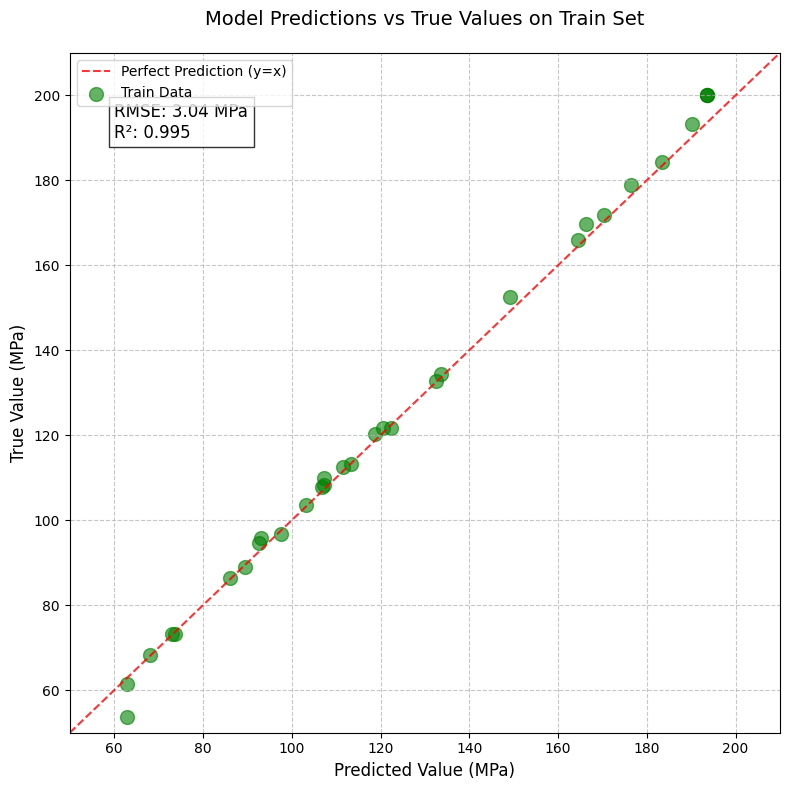

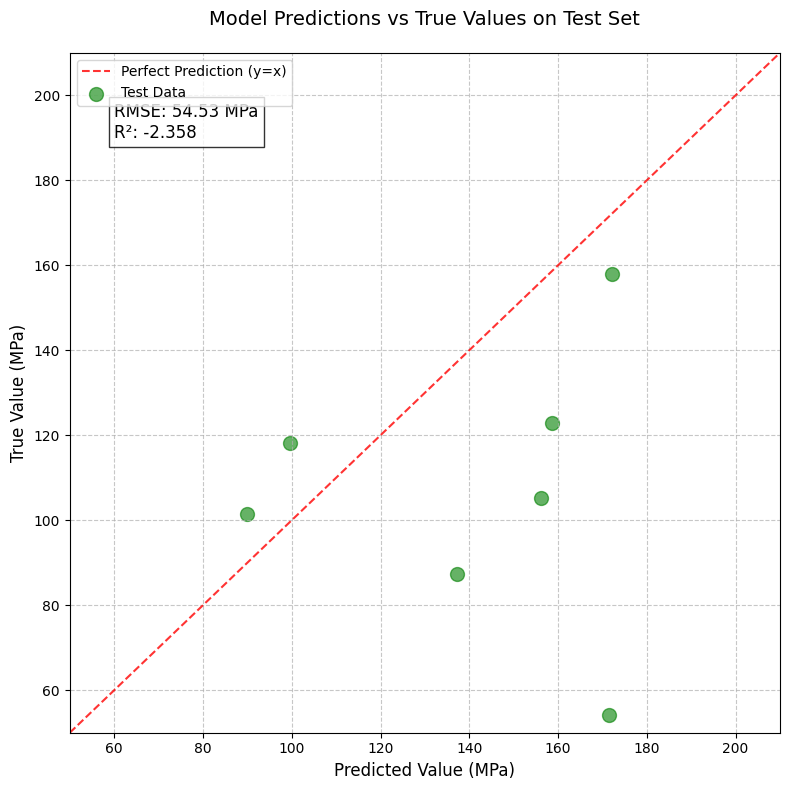

In [77]:
# Create figure with appropriate size
plt.figure(figsize=(8, 8))

# Get predictions for train set
y_pred_train = 50 + (model.predict(x_train[:,:,:,]).reshape(train_number))*150
y_true_train = (y_train)*150 + 50

# Set plot limits and grid
plt.xlim([50,210])
plt.ylim([50,210])
plt.grid(True, linestyle='--', alpha=0.7)

# Plot ideal prediction line
xaxis = np.linspace(50,220,100)
plt.plot(xaxis, xaxis, 'r--', label='Perfect Prediction (y=x)', alpha=0.8)

# Scatter plot of predictions
plt.scatter(y_pred_train, y_true_train, c='green', alpha=0.6, s=100, label='Train Data')

# Calculate error metrics
mse = np.mean((y_pred_train - y_true_train) ** 2)
rmse = np.sqrt(mse)

# Calculate R² score
ss_res = np.sum((y_true_train - y_pred_train) ** 2)
ss_tot = np.sum((y_true_train - np.mean(y_pred_train)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Add labels and title
plt.ylabel("True Value (MPa)", fontsize=12)
plt.xlabel("Predicted Value (MPa)", fontsize=12)
plt.title("Model Predictions vs True Values on Train Set", fontsize=14, pad=20)

# Display RMSE and R²
plt.text(60, 190, f'RMSE: {rmse:.2f} MPa\nR²: {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add legend and adjust layout
plt.legend(fontsize=10)
plt.tight_layout()

# Create figure with appropriate size
plt.figure(figsize=(8, 8))

# Get predictions for test set
y_pred_test = 50 + (model.predict(x_test[:,:,:,]).reshape(test_number))*150
y_true_test = (y_test)*150 + 50

# Set plot limits and grid
plt.xlim([50,210])
plt.ylim([50,210])
plt.grid(True, linestyle='--', alpha=0.7)

# Plot ideal prediction line
xaxis = np.linspace(50,220,100)
plt.plot(xaxis, xaxis, 'r--', label='Perfect Prediction (y=x)', alpha=0.8)

# Scatter plot of predictions
plt.scatter(y_pred_test, y_true_test, c='green', alpha=0.6, s=100, label='Test Data')

# Calculate error metrics
mse = np.mean((y_pred_test - y_true_test) ** 2)
rmse = np.sqrt(mse)

# Calculate R² score
ss_res = np.sum((y_true_test - y_pred_test) ** 2)
ss_tot = np.sum((y_true_test - np.mean(y_true_test)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Add labels and title
plt.ylabel("True Value (MPa)", fontsize=12)
plt.xlabel("Predicted Value (MPa)", fontsize=12)
plt.title("Model Predictions vs True Values on Test Set", fontsize=14, pad=20)

# Display RMSE and R²
plt.text(60, 190, f'RMSE: {rmse:.2f} MPa\nR²: {r2:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Add legend and adjust layout
plt.legend(fontsize=10)
plt.tight_layout()

In [36]:
# Save model in TensorFlow's SavedModel format (.pb)
tf.saved_model.save(model, "CNN_toughness_model")

INFO:tensorflow:Assets written to: CNN_toughness_model\assets


INFO:tensorflow:Assets written to: CNN_toughness_model\assets
